In [1]:
import pandas as pd
import numpy as np

df_sans_doublons = pd.read_csv('../dataSansDoublons.csv')
df_binaire = pd.read_csv('../dataBinaire.csv')
df_log_transforme = pd.read_csv('../dataLogTransforme.csv')

Caractéristiques sélectionnées: ['CoInitializeEx', 'CoInitializeSecurity', 'CreateActCtxW', 'CreateDirectoryW', 'CreateProcessInternalW', 'CreateThread', 'CreateToolhelp32Snapshot', 'CryptEncrypt', 'DrawTextExW', 'FindFirstFileExW', 'FindResourceExW', 'FindResourceW', 'FindWindowW', 'GetCursorPos', 'GetFileAttributesW', 'GetFileSize', 'GetFileSizeEx', 'GetFileType', 'GetFileVersionInfoW', 'GetForegroundWindow', 'GetKeyState', 'GetSystemDirectoryW', 'GetSystemInfo', 'GetSystemMetrics', 'GetSystemTimeAsFileTime', 'GetSystemWindowsDirectoryW', 'GetTempPathW', 'LdrGetDllHandle', 'LdrGetProcedureAddress', 'LdrLoadDll', 'LdrUnloadDll', 'LoadResource', 'LoadStringW', 'MoveFileWithProgressW', 'NtAllocateVirtualMemory', 'NtClose', 'NtCreateFile', 'NtCreateMutant', 'NtCreateSection', 'NtDeviceIoControlFile', 'NtDuplicateObject', 'NtFreeVirtualMemory', 'NtMapViewOfSection', 'NtOpenFile', 'NtOpenKey', 'NtOpenKeyEx', 'NtOpenMutant', 'NtOpenSection', 'NtProtectVirtualMemory', 'NtQueryAttributesFile'

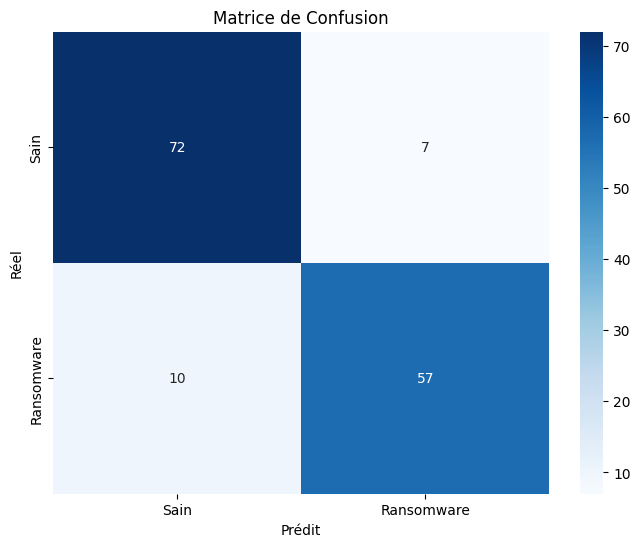

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Division en caractéristiques et cible
X_log = df_log_transforme.drop('Sample_Type', axis=1)
y_log = df_log_transforme['Sample_Type']

# Division en ensembles d'entraînement et de test
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Initialisation du classifieur Random Forest
rf_log = RandomForestClassifier(n_estimators=200, random_state=42)

# Utilisation de RFE pour sélectionner les 86 meilleures caractéristiques
nb_fonctionnalites = 86
rfe_log = RFE(estimator=rf_log, n_features_to_select=nb_fonctionnalites, step=1)
rfe_log.fit(X_train_log, y_train_log)

# Obtention des caractéristiques sélectionnées
fonctionnalites_selectionnees = X_log.columns[rfe_log.support_]
print(f"Caractéristiques sélectionnées: {fonctionnalites_selectionnees.tolist()}")

# Création d'un jeu de données avec les caractéristiques sélectionnées
X_train_rfe_log = X_train_log[fonctionnalites_selectionnees]
X_test_rfe_log = X_test_log[fonctionnalites_selectionnees]

# Entraînement du Random Forest
rf_log.fit(X_train_rfe_log, y_train_log)

# Prédictions
y_pred_log = rf_log.predict(X_test_rfe_log)

# Évaluation du modèle
print(f"Précision: {accuracy_score(y_test_log, y_pred_log):.4f}")
print("\nRapport de classification:")
print(classification_report(y_test_log, y_pred_log))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm_log = confusion_matrix(y_test_log, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sain', 'Ransomware'],
            yticklabels=['Sain', 'Ransomware'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


Caractéristiques sélectionnées: ['CertControlStore', 'CreateDirectoryW', 'CreateProcessInternalW', 'CreateThread', 'CreateToolhelp32Snapshot', 'CryptAcquireContextA', 'CryptEncrypt', 'DrawTextExW', 'FindFirstFileExW', 'FindResourceExW', 'FindResourceW', 'FindWindowW', 'GetCursorPos', 'GetDiskFreeSpaceExW', 'GetFileSizeEx', 'GetFileType', 'GetFileVersionInfoW', 'GetForegroundWindow', 'GetKeyboardState', 'GetKeyState', 'GetSystemInfo', 'GetSystemMetrics', 'GetSystemTimeAsFileTime', 'GetTempPathW', 'GetTimeZoneInformation', 'GlobalMemoryStatusEx', 'IsDebuggerPresent', 'LdrGetProcedureAddress', 'LdrLoadDll', 'LdrUnloadDll', 'LoadResource', 'LookupPrivilegeValueW', 'NtClose', 'NtCreateMutant', 'NtDeleteKey', 'NtDeviceIoControlFile', 'NtDuplicateObject', 'NtEnumerateValueKey', 'NtFreeVirtualMemory', 'NtOpenDirectoryObject', 'NtOpenFile', 'NtOpenKey', 'NtOpenMutant', 'NtOpenSection', 'NtOpenThread', 'NtProtectVirtualMemory', 'NtQueryAttributesFile', 'NtQueryInformationFile', 'NtQueryKey', 'Nt

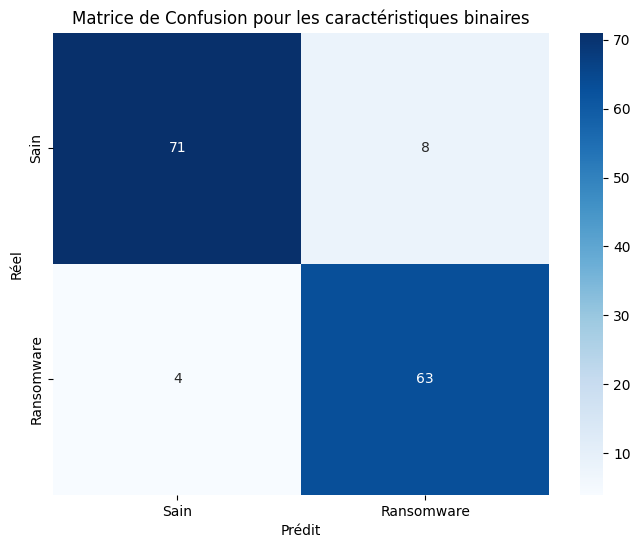

In [3]:
# Division en caractéristiques et cible
X_bin = df_binaire.drop('Sample_Type', axis=1)
y_bin = df_binaire['Sample_Type']

# Division en ensembles d'entraînement et de test
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Initialisation du classifieur Random Forest
rf_bin = RandomForestClassifier(n_estimators=200, random_state=42)

# Utilisation de RFE pour sélectionner les meilleures caractéristiques
nb_fonctionnalites = 86
rfe_bin = RFE(estimator=rf_bin, n_features_to_select=nb_fonctionnalites, step=1)
rfe_bin.fit(X_bin_train, y_bin_train)

# Obtention des caractéristiques sélectionnées
fonctionnalites_selectionnees_bin = X_bin.columns[rfe_bin.support_]
print(f"Caractéristiques sélectionnées: {fonctionnalites_selectionnees_bin.tolist()}")

# Création d'un jeu de données avec les caractéristiques sélectionnées
X_bin_train_rfe = X_bin_train[fonctionnalites_selectionnees_bin]
X_bin_test_rfe = X_bin_test[fonctionnalites_selectionnees_bin]

# Entraînement du Random Forest
rf_bin.fit(X_bin_train_rfe, y_bin_train)

# Prédictions
y_bin_pred = rf_bin.predict(X_bin_test_rfe)

# Évaluation du modèle
print(f"Précision: {accuracy_score(y_bin_test, y_bin_pred):.4f}")
print("\nRapport de classification:")
print(classification_report(y_bin_test, y_bin_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm_bin = confusion_matrix(y_bin_test, y_bin_pred)
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sain', 'Ransomware'],
            yticklabels=['Sain', 'Ransomware'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion pour les caractéristiques binaires')
plt.show()
